In [164]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [217]:
players = pd.read_csv('Data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
pd.set_option('display.max_columns', None)
players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

What we noticed here:
- Appearantly, there are no null values.
- The age is of type float not int


In [137]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

What we notice here:
- The shortest player's height is 156 and the tallest player's height is 206 which is odd for a soccer player.
- The youngest player is 15 years old while the oldest is 43 years old which is also odd.
- There are some players who didn't appear in the season.
- There are some players, mostly goal keepers, who didn't score any goals.


In [138]:
players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [139]:
# Checking the youngest and oldest players
# As we see here, most of the youngest players don't have a market value.
# The oldest player is Japanese which explains why he is the oldest here.
players[(players['age'] == 15) | (players['age'] == 43)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
6724,/stiven-jimenez/profil/spieler/1008431,FC Cincinnati,Stiven Jimenez,midfield-DefensiveMidfield,168.000000,15.0,9,0.0,0.136364,0.545455,0.0,0.0,0.0,0.0,660,0,0,0,0,0,3,0
6989,/nimfasha-berchimas/profil/spieler/1000273,Charlotte FC,Nimfasha Berchimas,Attack-LeftWinger,181.240353,15.0,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,65,0,0,0,25000,25000,4,1
7267,/luis-rivera/profil/spieler/999379,Real Salt Lake City,Luis Rivera,Defender Centre-Back,181.240353,15.0,7,0.0,0.190678,0.190678,0.0,0.0,0.0,0.0,472,0,0,0,50000,50000,2,0
7290,/axel-kei/profil/spieler/921859,Real Salt Lake City,Axel Kei,Attack Centre-Forward,185.000000,15.0,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,44,103,18,0,0,0,4,0
7427,/maximo-carrizo/profil/spieler/989968,New York City FC,Máximo Carrizo,midfield-AttackingMidfield,160.000000,15.0,4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,295,0,0,0,0,0,3,0
8662,/taiga-kameda/profil/spieler/1126311,Vissel Kobe,Taiga Kameda,Goalkeeper,183.000000,15.0,5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.4,450,0,0,0,0,0,1,0
8722,/shinji-ono/profil/spieler/4379,Hokkaido Consadole Sapporo,Shinji Ono,midfield-AttackingMidfield,175.000000,43.0,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,351,54,7,25000,5600000,3,0


In [140]:
# Checking the shortest and tallest players
players[(players['height'] == 156) | (players['height'] == 206)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2439,/isaak-toure/profil/spieler/708678,AJ Auxerre,Isaak Touré,Defender Centre-Back,206.0,20.0,42,0.032597,0.000000,0.260775,0.032597,0.000000,0.000000,0.000000,2761,129,1,0,5000000,5000000,2,0
2700,/kjell-scherpen/profil/spieler/463527,Vitesse Arnhem,Kjell Scherpen,Goalkeeper,206.0,23.0,39,0.000000,0.000000,0.000000,0.000000,0.025766,1.288291,0.283424,3493,78,9,2,2000000,2800000,1,0
7563,/nahuel-barrios/profil/spieler/503377,CA San Lorenzo de Almagro,Nahuel Barrios,Attack-LeftWinger,156.0,25.0,4,0.000000,0.283912,0.000000,0.000000,0.000000,0.000000,0.000000,317,13,2,0,3500000,3500000,4,1


We noticed here that:
- There are no duplicated players
- There are in total 374 teams and the South Korean soccer team Daejeon Hana Citizen has the highest number of players
- Not all names are unique which is normal, but the could also mean that the inforamtion of some players with the same first name didn't include their last names.
- There are 16 different position.

In [9]:
players.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

<p><b>Evaluating Reliability:</b></p>
<p>The dataset was found on Kaggle. It was scrapped by Khang Huynh Nguyen Trong and Minh Nguyen  Transfermarkt using Selenium and BeautifulSoup on June 10, 2023. Therefore, the data source is reliable</p>

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

<p><b>Evaluating Timeliness:</b></p>
<p>After careful looking into the data and the data description, we found out that the time of interest is the year 2022</p>

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


<p><b>Evaluating Consistency:</b></p>
<p>we only have one dataset from one data source, so it is consistent</p>

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


1. Sample Appropriateness:
- The dataset is for soccer players.
- The data is from the year 2022.

The sample is relevant for the analysis objectives.

2. Variable Selection:

In [12]:
# Checking columns 
players.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

player and name columns are not relevant for the analysis objectives that includes a predictive objective and the position column is already encoded in position_encoded.

In [236]:
# Dropping irrelevant columns
players.drop(columns={'player', 'name', 'position'}, axis=1, inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [142]:
# There are no duplicated rows.
# However, all the columns in this dataset can have duplicated within themselves, which is noraml.
players.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [143]:
#Display number missing values per column
# There are no missing values and describe in the data profiling didn't show any unusual values that
# indicaties the presence of missing values.
players.isna().sum()

team                   0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [144]:
# check columns types 
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   height               10754 non-null  float64
 2   age                  10754 non-null  float64
 3   appearance           10754 non-null  int64  
 4   goals                10754 non-null  float64
 5   assists              10754 non-null  float64
 6   yellow cards         10754 non-null  float64
 7   second yellow cards  10754 non-null  float64
 8   red cards            10754 non-null  float64
 9   goals conceded       10754 non-null  float64
 10  clean sheets         10754 non-null  float64
 11  minutes played       10754 non-null  int64  
 12  days_injured         10754 non-null  int64  
 13  games_injured        10754 non-null  int64  
 14  award                10754 non-null  int64  
 15  current_value        10754 non-null 

In [145]:
# Checking age unique values
# Age is usually represented as int -> converting it in data cleaning
players['age'].unique()

array([32.        , 30.        , 37.        , 25.        , 28.        ,
       31.        , 21.        , 27.        , 23.        , 22.        ,
       24.        , 26.        , 29.        , 20.        , 18.        ,
       38.        , 35.        , 33.        , 36.        , 19.        ,
       34.        , 41.        , 39.        , 17.        , 40.        ,
       42.        , 16.        , 15.        , 43.        , 26.04190334])

In [146]:
# Checking current_value unique values
# Prices are usually represented in float -> conveting it in data cleaning
players['current_value'].unique()

array([ 15000000,   1500000,    600000,  50000000,  40000000,  25000000,
         2000000,  35000000,  22000000,  10000000,  20000000,  17000000,
          800000,  75000000,  80000000,  55000000,  70000000,   3000000,
               0,  14000000,   8000000,   1000000,  32000000,  28000000,
        18000000,  12000000,   2500000,   9000000,  45000000,  38000000,
        27000000,  16000000,   5000000,   3500000,  30000000,   4000000,
          400000,   1800000,    200000,    500000,   7000000,   6000000,
        42000000,  11000000,   1200000,  13000000,   2200000,    350000,
        21000000,    250000,    700000,  48000000,  65000000,  60000000,
          300000, 110000000, 170000000,  90000000,  85000000,     75000,
         6500000,     50000,    100000,   8500000,   4500000,   7500000,
         5500000,    150000,   2400000,     25000,    750000,    900000,
          225000,   1700000,   1400000,   1100000,    650000, 120000000,
         2800000, 100000000, 150000000,   2300000, 

In [147]:
# Checking heighest_value unique values
# Prices are usually represented in float -> conveting it in data cleaning
players['highest_value'].unique()

array([ 70000000,  22000000,   6000000,  50000000,  80000000,  35000000,
        20000000,   2000000,  42000000,  12000000,  40000000, 100000000,
        55000000,    800000,  90000000,  85000000, 130000000,  25000000,
        75000000,   7000000,  65000000,  30000000,  17500000,   9000000,
        32000000,  13000000,  45000000,   8000000,  18000000,  10000000,
         3500000,  15000000,  28000000,  60000000,    400000,  27000000,
        37000000,  38000000, 150000000,   4000000,    200000,   2500000,
         5000000,    500000,   3000000,  16000000,   6500000,   1500000,
        11000000,    700000,  14000000,  19000000,   5500000,   7500000,
          600000,  17000000,   1800000,    250000,   4500000,  21000000,
        23000000, 110000000,         0,   1000000, 170000000,    300000,
       160000000,     50000,    100000,   1200000,   2200000,    350000,
         1250000,  24000000,   2400000,   2800000,   8500000,    750000,
         3200000,   2250000,    900000,    150000, 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Correcting errors

-------------------

In [218]:
# Converting age from float to int
players['age'] = players['age'].astype(int)

In [219]:
# Converting current_value from int to float
players['current_value'] = players['current_value'].astype(float)

In [220]:
# Converting highest_value from int to float
players['highest_value'] = players['highest_value'].astype(float)

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [237]:
# Dropping age outliers

z_scores = zscore(players['age'])

outliers = np.abs(z_scores) > 3

# Removing the outliers
players_no_outliers = players[~outliers]

In [238]:
# Dropping height outliers

z_scores = zscore(players['height'])

outliers = np.abs(z_scores) > 3

# Removing the outliers
players_no_outliers = players[~outliers]

In [223]:
# It is not usual for soccer players to have 0 current_value and it is safer to drop them than
# to try to impute them since they are just a few rows out of 10000 rows
players_no_outliers[players_no_outliers['current_value'] == 0]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
29,/mason-greenwood/profil/spieler/532826,Manchester United,Mason Greenwood,Attack-RightWinger,181.000000,21,24,0.317647,0.105882,0.105882,0.0,0.0,0.0,0.0,1700,135,12,0,0.0,50000000.0,4,1
406,/sven-botman/profil/spieler/361093,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23,76,0.041159,0.013720,0.123476,0.0,0.0,0.0,0.0,6560,118,19,4,0.0,0.0,2,0
407,/fabian-schar/profil/spieler/135343,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31,67,0.045678,0.076129,0.182710,0.0,0.0,0.0,0.0,5911,285,30,3,0.0,0.0,2,0
408,/jamaal-lascelles/profil/spieler/183318,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29,38,0.068992,0.000000,0.310464,0.0,0.0,0.0,0.0,2609,418,57,2,0.0,0.0,2,0
409,/matt-targett/profil/spieler/250478,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27,54,0.023747,0.023747,0.094987,0.0,0.0,0.0,0.0,3790,380,66,0,0.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,/zahi-addis/profil/spieler/1069563,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,2,1
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3,0
10686,/corey-hollman/profil/spieler/890186,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3,0,0,0,0.0,0.0,3,0


In [239]:
players_no_outliers = players_no_outliers[players_no_outliers['current_value'] != 0]

### Feature Engineering

#### Encoding Categorical Variables

In [240]:
# Encoding the team column
players_encoded = pd.get_dummies(players_no_outliers, columns=['team'])

In [226]:
# Checking the encoded column
players_encoded.head(2) # the new shape is (10568, 392)

,player,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,team_AC Monza,team_ACF Fiorentina,team_AFC Bournemouth,team_AJ Auxerre,team_AS Monaco,team_AS Roma,team_AZ Alkmaar,team_Abha Club,team_Adana Demirspor,team_Adelaide United,team_Ajax Amsterdam,team_Akhmat Grozny,team_Al-Adalah FC,team_Al-Batin FC,team_Al-Fateh SC,team_Al-Fayha FC,team_Al-Hilal Saudi FC,team_Al-Ittihad Club (Jeddah),team_Al-Khaleej,team_Al-Nassr FC,team_Al-Raed SFC,team_Al-Shabab Club (Riyadh),team_Al-Taawoun FC,team_Al-Tai,team_Al-Wehda FC,team_Alanyaspor,team_Albirex Niigata,team_AmaZulu FC,team_América Futebol Clube (MG),team_Angers SCO,team_Antalyaspor,team_Arsenal FC,team_Arsenal Fútbol Club,team_Aston Villa,team_Atalanta BC,team_Athletic Bilbao,team_Atlanta United FC,team_Atlas Guadalajara,team_Atlético de Madrid,team_Atlético de San Luis,team_Austin FC,team_Austria Vienna,team_Avispa Fukuoka,team_Basaksehir FK,team_Bayer 04 Leverkusen,team_Bayern Munich,team_Besiktas JK,team_Birmingham City,team_Blackburn Rovers,team_Blackpool FC,team_Boavista FC,team_Bologna FC 1909,team_Borussia Dortmund,team_Borussia Mönchengladbach,team_Botafogo de Futebol e Regatas,team_Brentford FC,team_Brighton &amp; Hove Albion,team_Brisbane Roar,team_Bristol City,team_Burnley FC,team_CA Banfield,team_CA Barracas Central,team_CA Boca Juniors,team_CA Central Córdoba (SdE),team_CA Colon,team_CA Huracán,team_CA Independiente,team_CA Newell's Old Boys,team_CA Osasuna,team_CA River Plate,team_CA Rosario Central,team_CA San Lorenzo de Almagro,team_CA Sarmiento (Junin),team_CA Vélez Sarsfield,team_CD Cruz Azul,team_CD Godoy Cruz Antonio Tomba,team_CD Santa Clara,team_CF América,team_CF Monterrey,team_CF Montréal,team_CF Pachuca,team_CR Flamengo,team_CS Marítimo,team_CSKA Moscow,team_Cape Town City FC,team_Cardiff City,team_Casa Pia AC,team_Celta de Vigo,team_Central Coast Mariners,team_Cerezo Osaka,team_Charlotte FC,team_Chelsea FC,team_Chicago Fire FC,team_Chippa United,team_Clermont Foot 63,team_Club Athletico Paranaense,team_Club Atlético Belgrano,team_Club Atlético Lanús,team_Club Atlético Platense,team_Club Atlético Talleres,team_Club Atlético Tigre,team_Club Atlético Tucumán,team_Club Atlético Unión,team_Club Estudiantes de La Plata,team_Club León FC,team_Club Necaxa,team_Club Tijuana,team_Club de Gimnasia y Esgrima La Plata,team_Clube Atlético Mineiro,team_Clube de Regatas Vasco da Gama,team_Colorado Rapids,team_Columbus Crew,team_Coritiba Foot Ball Club,team_Coventry City,team_Cruzeiro Esporte Clube,team_Crystal Palace,team_Cuiabá Esporte Clube (MT),team_Cádiz CF,team_D.C. United,team_Daegu FC,team_Daejeon Hana Citizen,team_Damac FC,team_Defensa y Justicia,team_Deportivo Guadalajara,team_Deportivo Toluca,team_Dynamo Moscow,team_ESTAC Troyes,team_Eintracht Frankfurt,team_Elche CF,team_Esporte Clube Bahia,team_Ettifaq FC,team_Everton FC,team_Excelsior Rotterdam,team_FC Arouca,team_FC Augsburg,team_FC Barcelona,team_FC Cincinnati,team_FC Dallas,team_FC Emmen,team_FC Empoli,team_FC Famalicão,team_FC Groningen,team_FC Juárez,team_FC Lorient,team_FC Nantes,team_FC Pari Nizhniy Novgorod,team_FC Paços de Ferreira,team_FC Porto,team_FC Schalke 04,team_FC Seoul,team_FC Sochi,team_FC Tokyo,team_FC Toulouse,team_FC Utrecht,team_FC Vizela,team_FC Volendam,team_FK Khimki,team_FK Krasnodar,team_FK Orenburg,team_FK Rostov,team_Fakel Voronezh,team_Fatih Karagümrük,team_Fenerbahce,team_Feyenoord Rotterdam,team_Fluminense Football Club,team_Fortaleza Esporte Clube,team_Fortuna Sittard,team_Fulham FC,team_GD Chaves,team_GD Estoril Praia,team_Galatasaray,team_Gamba Osaka,team_Gangwon FC,team_Gaziantep FK,team_Getafe CF,team_Gil Vicente FC,team_Giresunspor,team_Girona FC,team_Go Ahead Eagles,team_Goiás Esporte Clu

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [13]:
players.head(3)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000.0,70000000.0,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000.0,22000000.0,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000.0,6000000.0,1,0


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

##### Top 10 teams with most/least soccer players

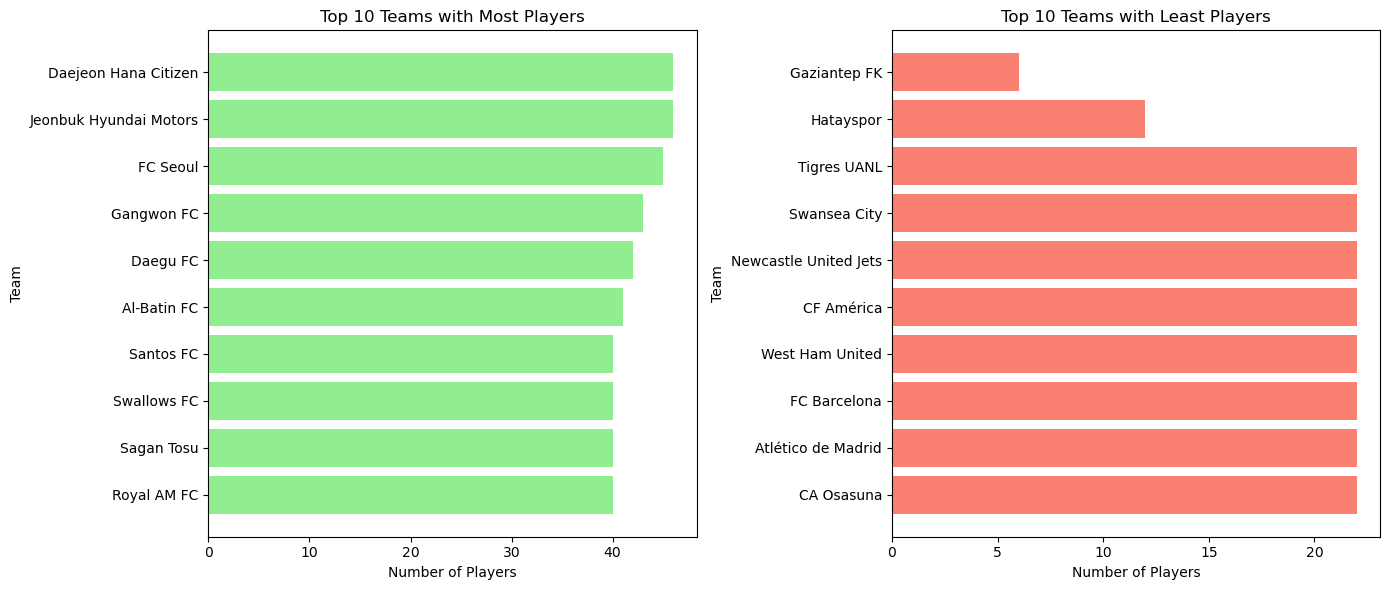

In [47]:
teams_count = players['team'].value_counts().sort_values(ascending=False)

top_10_most = teams_count.head(10).iloc[::-1] 
top_10_least = teams_count.tail(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot top 10 teams with most players
axes[0].barh(top_10_most.index, top_10_most.values, color='lightgreen')
axes[0].set_title('Top 10 Teams with Most Players')
axes[0].set_xlabel('Number of Players')
axes[0].set_ylabel('Team')

# Plot top 10 teams with least players
axes[1].barh(top_10_least.index, top_10_least.values, color='salmon')
axes[1].set_title('Top 10 Teams with Least Players')
axes[1].set_xlabel('Number of Players')
axes[1].set_ylabel('Team')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

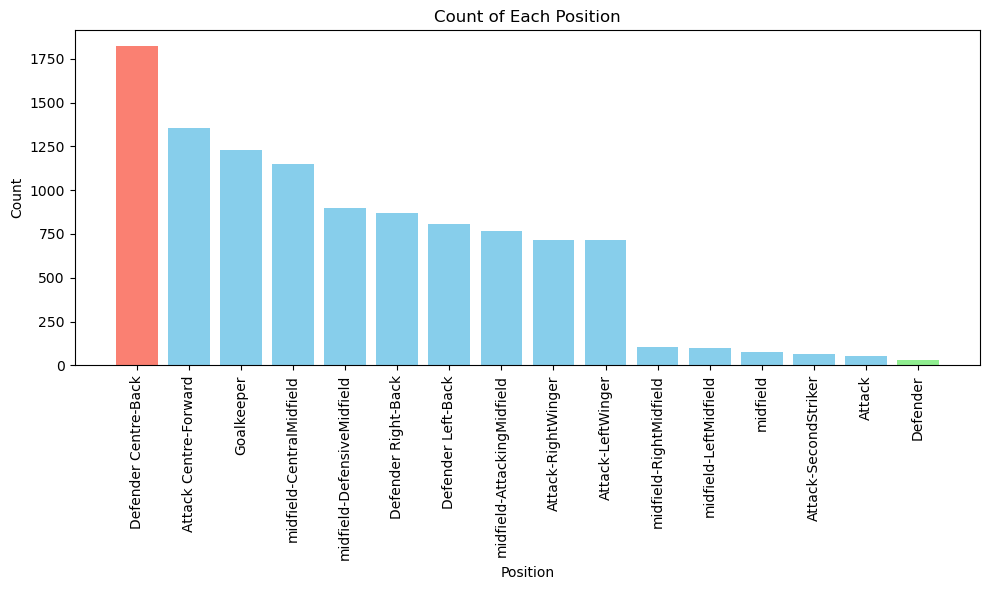

In [181]:
position_counts = players['position'].value_counts()

# Determine the positions with the most and least players
max_position = position_counts.idxmax()  # Position with the most players
min_position = position_counts.idxmin()  # Position with the least players

# Create a list of colors for each position based on its count
colors = position_counts.apply(lambda x: 'salmon' if x == position_counts.max() else 'lightgreen' if x == position_counts.min() else 'skyblue')

# Create a bar chart for the count of each position
plt.figure(figsize=(10, 6))
plt.bar(position_counts.index, position_counts.values, color=colors)

# Set the title and labels
plt.title('Count of Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate x-axis labels if needed (useful if position names are long)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

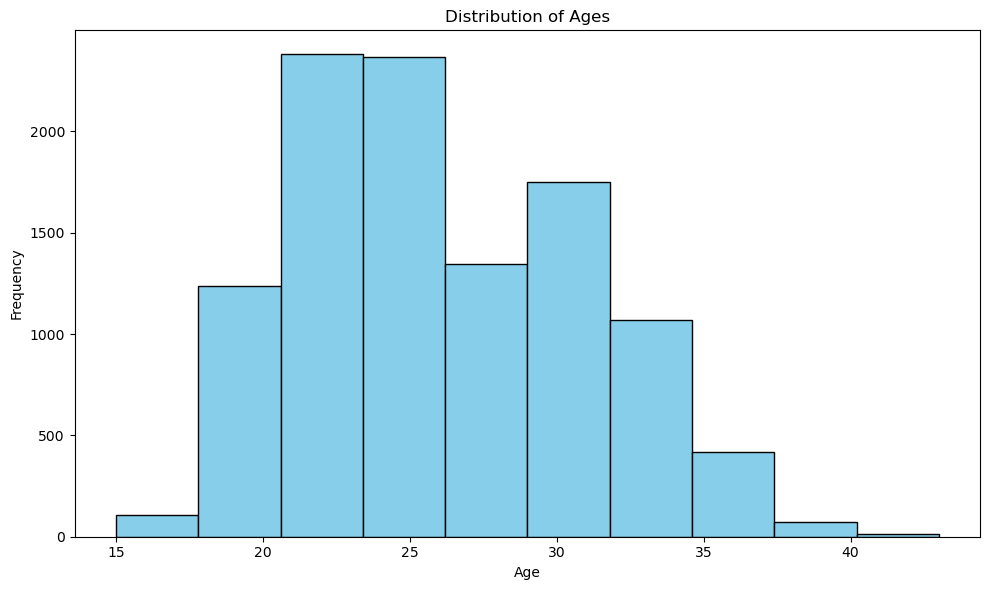

In [58]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['age'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

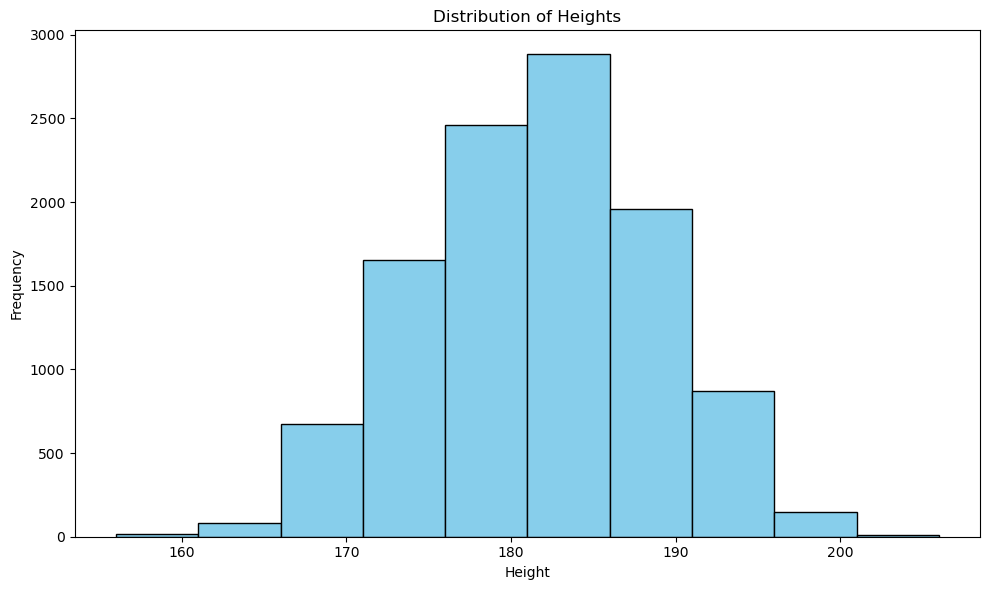

In [59]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['height'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

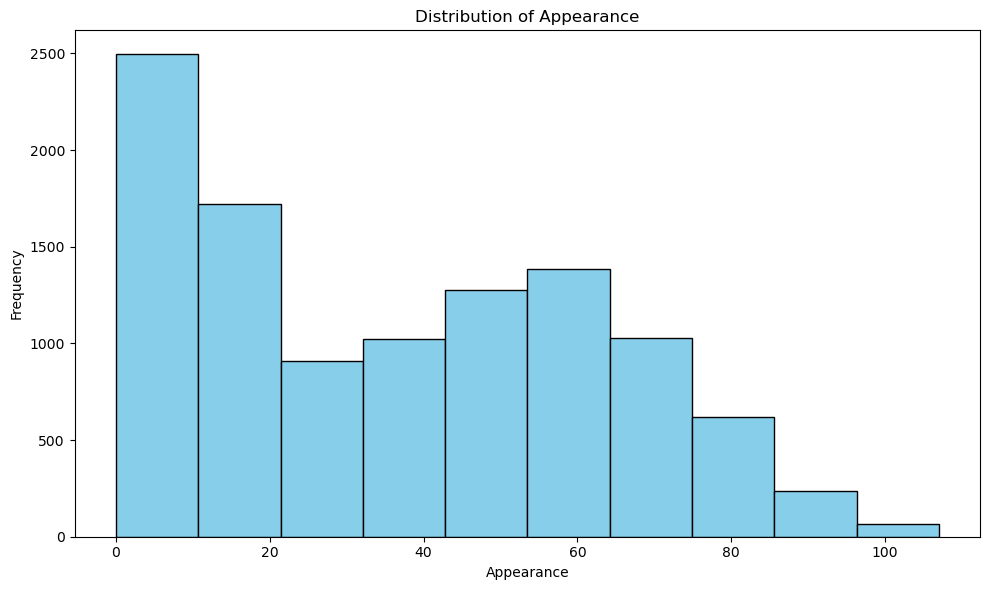

In [60]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['appearance'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Appearance')
plt.xlabel('Appearance')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

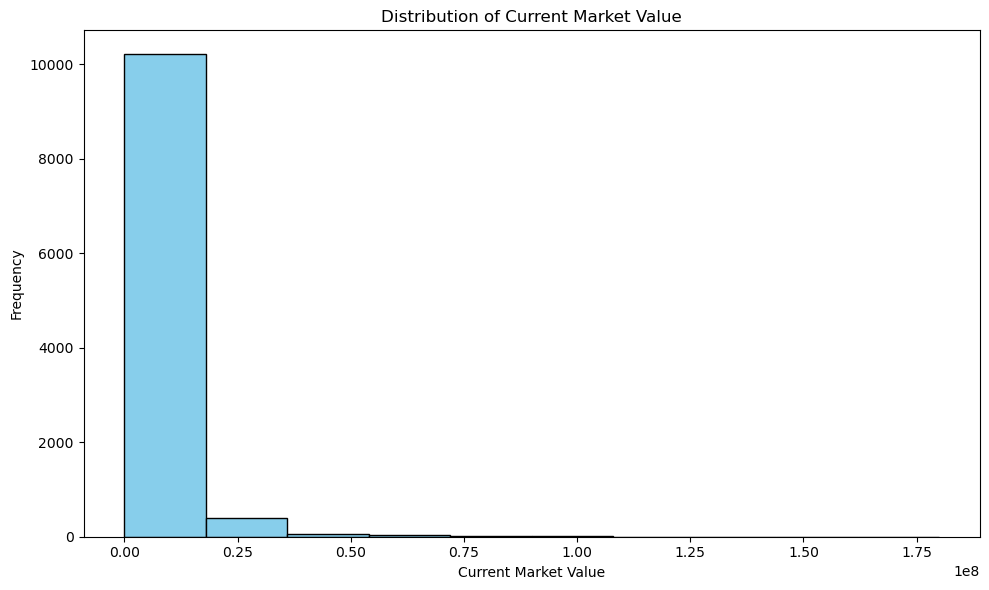

In [69]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['current_value'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Current Market Value')
plt.xlabel('Current Market Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

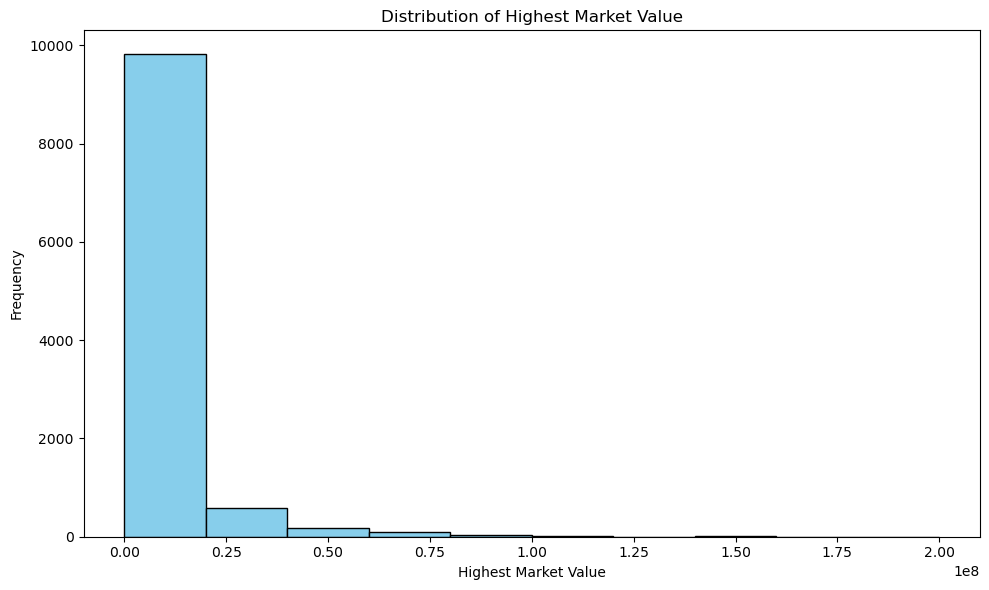

In [70]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['highest_value'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Highest Market Value')
plt.xlabel('Highest Market Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [14]:
# It makes sense to drop these outliers
z_scores = zscore(players['age'])
outliers = np.abs(z_scores) > 3
outlier_values = players['age'][outliers]
print(outlier_values)


134      41
1126     41
1278     41
1632     42
2081     41
2571     42
3281     42
3945     42
4709     42
7596     42
7598     41
7896     42
8722     43
10512    41
Name: age, dtype: int32


In [15]:
# It makes sense to drop these outliers
z_scores = zscore(players['height'])
outliers = np.abs(z_scores) > 3
outlier_values = players['height'][outliers]
print(outlier_values)

2439     206.0
2700     206.0
3236     160.0
3770     204.0
4402     160.0
4625     160.0
5951     160.0
6725     160.0
6894     160.0
7427     160.0
7563     156.0
8085     160.0
8143     160.0
8288     159.0
8472     160.0
8647     160.0
9019     160.0
9341     160.0
10258    160.0
10612    160.0
Name: height, dtype: float64


In [16]:
#It doesn't make sense to drop 203 rows because we have a lot of zeros 
z_scores = zscore(players['current_value'])
outliers = np.abs(z_scores) > 3
outlier_values = players['current_value'][outliers]
print('The outliers of current market values falls between ', outlier_values.min(), 'and',
      outlier_values.max())

The outliers of current market values falls between  32000000.0 and 180000000.0


In [17]:
#It doesn't make sense to drop 203 rows because we have a lot of zeros 
z_scores = zscore(players['highest_value'])
outliers = np.abs(z_scores) > 3
outlier_values = players['highest_value'][outliers]
print(outlier_values)
print('The outliers of highest market values falls between ', outlier_values.min(), 'and',
      outlier_values.max())

0        70000000.0
3        50000000.0
4        80000000.0
5        70000000.0
14       80000000.0
           ...     
6328    100000000.0
6814     55000000.0
7509     75000000.0
8682     70000000.0
9433    120000000.0
Name: highest_value, Length: 239, dtype: float64
The outliers of highest market values falls between  48000000.0 and 200000000.0


In [18]:
# Calculate the IQR for 'current_value' column
Q1_current = players['current_value'].quantile(0.25)
Q3_current = players['current_value'].quantile(0.75)
IQR_current = Q3_current - Q1_current

# Calculate lower and upper bounds for 'current_value'
lower_bound_current = Q1_current - 1.5 * IQR_current
upper_bound_current = Q3_current + 1.5 * IQR_current

# Find the outliers for 'current_value'
outliers_current = players[(players['current_value'] < lower_bound_current) | (players['current_value'] > upper_bound_current)]

# Print out the outliers for 'current_value'
print(outliers_current)

                                        player                     team  \
0           /david-de-gea/profil/spieler/59377        Manchester United   
3     /lisandro-martinez/profil/spieler/480762        Manchester United   
4        /raphael-varane/profil/spieler/164770        Manchester United   
5         /harry-maguire/profil/spieler/177907        Manchester United   
6       /victor-lindelof/profil/spieler/184573        Manchester United   
...                                        ...                      ...   
8957    /aaron-boupendza/profil/spieler/427605  Al-Shabab Club (Riyadh)   
9399            /michael/profil/spieler/520392        Al-Hilal Saudi FC   
9418     /ghislain-konan/profil/spieler/422850              Al-Nassr FC   
9427            /talisca/profil/spieler/258626              Al-Nassr FC   
9433    /cristiano-ronaldo/profil/spieler/8198              Al-Nassr FC   

                   name                    position  height  age  appearance  \
0          David de

In [19]:
# Calculate the IQR for 'highest_value' column
Q1_highest = players_no_outliers['highest_value'].quantile(0.25)
Q3_highest = players_no_outliers['highest_value'].quantile(0.75)
IQR_highest = Q3_highest - Q1_highest

# Calculate lower and upper bounds for 'highest_value'
lower_bound_highest = Q1_highest - 1.5 * IQR_highest
upper_bound_highest = Q3_highest + 1.5 * IQR_highest

# Find the outliers for 'highest_value'
outliers_highest = players_no_outliers[(players_no_outliers['highest_value'] < lower_bound_highest) | 
                                       (players_no_outliers['highest_value'] > upper_bound_highest)]

# Print out the outliers for 'highest_value'
print(outliers_highest)

                                          player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
5           /harry-maguire/profil/spieler/177907         Manchester United   
...                                          ...                       ...   
9428        /pity-martinez/profil/spieler/281405               Al-Nassr FC   
9433      /cristiano-ronaldo/profil/spieler/8198               Al-Nassr FC   
10453                 /nani/profil/spieler/33706         Melbourne Victory   
10685         /jack-rodwell/profil/spieler/57079                 Sydney FC   
10736  /morgan-schneiderlin/profil/spieler/56818  Western Sydney Wanderers   

                      name                    position  height 

## 4. Bivariate/Multivariate Analysis:


The current and highest value are highly correlated. Also, appearance and minutes played are highly correlated. However, we cannot drop any of them because the affect the player's market value.

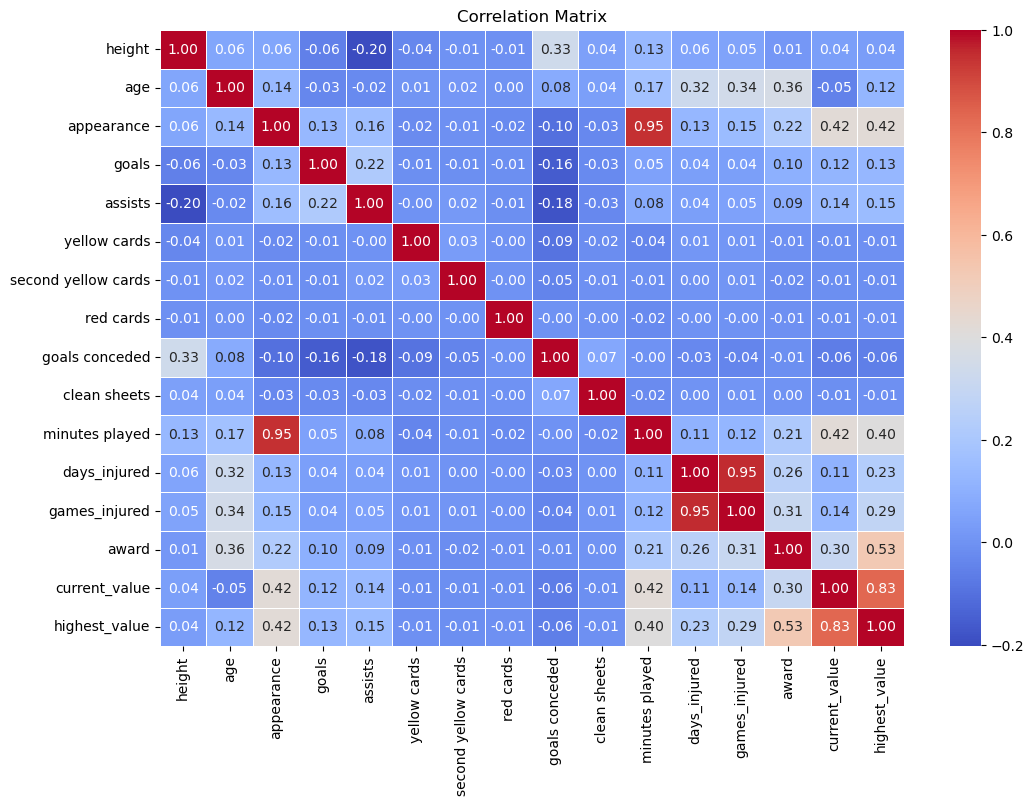

In [205]:
columns = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
    'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value'
]

selected_cols = players[columns]

correlation_matrix = selected_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Supervised Machine Learning Models

## Linear Regression

In [227]:
# Initiliazing the model
linear_regression = LinearRegression()

In [272]:
#Features (independent variables)
X = players_encoded.drop(columns=['current_value'])
# Target (dependent variable)
y = players_encoded['current_value']

# Splitint the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using threshold to drop highly correlated features.

In [273]:
corr_matrix = X_train.corr()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
X_train_selected = X_train.drop(columns=to_drop)
X_test_selected = X_test.drop(columns=to_drop)

In [282]:
len(to_drop)

1

In [274]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [275]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)

In [276]:
# Print the training metrics
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.4f}", "\n")

Training RMSE: 4024513.2209
Training MAE: 2086773.7345
Training R²: 0.7861
Training MSE: 16196706665407.9492 



In [277]:
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
mae_scores = []
r2_scores = []
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    mse_scores.append(mean_squared_error(y_val_fold, y_pred))
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred))
    r2_scores.append(r2_score(y_val_fold, y_pred))

# Print the validation metrics
print(f"Mean Validation RMSE: {np.sqrt(np.mean(mse_scores)):.4f}")
print(f"Mean Validation MAE: {np.mean(mae_scores):.4f}")
print(f"Mean Validation R²: {np.mean(r2_scores):.4f}")
print(f"Mean Validation MSE: {np.mean(mse_scores):.4f}", "\n")

Mean Validation RMSE: 4263591.8601
Mean Validation MAE: 2212735.7150
Mean Validation R²: 0.7610
Mean Validation MSE: 18178215549773.9609 



In [278]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Print the test metrics
print(f"Test Set RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")
print(f"Test Set MSE: {mean_squared_error(y_test, y_pred):.4f}")

Test Set RMSE: 5059220.9738
Test Set MAE: 2399433.8630
Test Set R²: 0.7807
Test Set MSE: 25595716861700.2734


The model seems to be overfitted. Therefore, we'll try dropping the team column.

In [251]:
players_no_teams = players_no_outliers.drop('team', axis=1)

In [252]:
# Features (independent variable)
X = players_no_teams.drop(columns=['current_value'])
# Target (dependent variable)
y = players_no_teams['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [254]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
# Create a LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train_scaled)

In [256]:
# Print the training metrics
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.4f}", "\n")

Training RMSE: 4389875.6698
Training MAE: 2193541.2146
Training R²: 0.7455
Training MSE: 19271008396447.7148 



In [257]:
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
mae_scores = []
r2_scores = []
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    mse_scores.append(mean_squared_error(y_val_fold, y_pred))
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred))
    r2_scores.append(r2_score(y_val_fold, y_pred))

# Print the validation metrics
print(f"Mean Validation RMSE: {np.sqrt(np.mean(mse_scores)):.4f}")
print(f"Mean Validation MAE: {np.mean(mae_scores):.4f}")
print(f"Mean Validation R²: {np.mean(r2_scores):.4f}")
print(f"Mean Validation MSE: {np.mean(mse_scores):.4f}", "\n")

Mean Validation RMSE: 4412325.0350
Mean Validation MAE: 2203670.3003
Mean Validation R²: 0.7437
Mean Validation MSE: 19468612214398.3945 



In [259]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Print the test metrics
print(f"Test Set RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")
print(f"Test Set MSE: {mean_squared_error(y_test, y_pred):.4f}")

Test Set RMSE: 5120327.3622
Test Set MAE: 2389548.5146
Test Set R²: 0.7754
Test Set MSE: 26217752296604.0000


R-squared in validation and training are roughly similar, which dropping the team column solved overfitting problem. <br> 
The model exhibited an improvemetn in R-squared in testing comparing to the training and valiadation, but the R-squared dropped by 0.1 after dropping the team column.

In [279]:
players_encoded.shape

(10568, 392)

In [280]:
players_no_teams.shape

(10568, 18)